# Pre Test set

x is 224 and y is 224 and z is 11
(50176, 11)


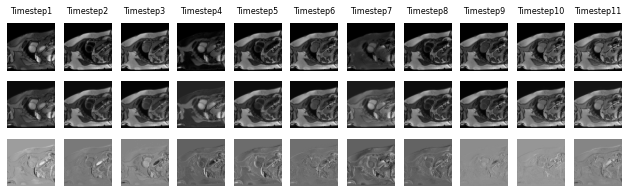

In [1]:
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from hyperspy.learn.rpca import rpca_godec, orpca
path = 'data/MOLLI_pre_dataset/test/9353628_20140129_MOLLI_1.npy'
vols = np.load(path).transpose(1, 2, 0)
x, y, z = vols.shape
print(f"x is {x} and y is {y} and z is {z}")
M = vols.reshape(x*y, z)
print(M.shape)
low, sparse, U, S, V = rpca_godec(M, rank=5)
low_matrix = low.reshape((x, y, z))
sparse_matrix = sparse.reshape((x, y, z))

fig = plt.figure(figsize=(11, 3))
title_font_size=8
title_pad = 10
for i in range(z):
    ax1 = fig.add_subplot(3, 11, 1+i)
    plt.imshow(vols[..., i], cmap='gray')
    plt.axis('off')
    ax1.set_title(f"Timestep{i+1}", fontsize=title_font_size, pad=title_pad)

    ax2 = fig.add_subplot(3, 11, 12+i)
    plt.imshow(low_matrix[..., i], cmap='gray')
    plt.axis('off')

    ax3 = fig.add_subplot(3, 11, 23+i)
    plt.imshow(sparse_matrix[..., i], cmap='gray')
    plt.axis('off')

In [2]:
import pandas as pd
df = pd.DataFrame()
df_2 = pd.DataFrame()

## Test Metrics

### Original volume

#### First Eigen Component percentage

In [3]:
from scripts.utils import *
orig_path = 'data/MOLLI_pre_dataset/test'
orig_pca_changes = []
for file in sorted(glob.glob(os.path.join(orig_path, '*.npy'))):
    vols = np.load(file).transpose(1, 2, 0)
    eig_org, org_K, org_dis = pca(vols, topk=1)
    orig_pca_changes.append(org_dis)
print(f"Mean of original PCA is {np.mean(np.array(orig_pca_changes))}")

Mean of original PCA is 0.7867720274668718


#### T1 fitting

In [4]:
import scipy.io
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_t1_changes(fig, path, subject_list, orig_t1err_square_list, orig_t1err_heart_list):
    for i, file in enumerate(sorted(glob.glob(os.path.join(path, '*.mat')))):
        subject = Path(file).stem
        subject_list.append(subject)
        fd = scipy.io.loadmat(file)
        SD_err = fd['S']
        areamask = fd['areamask']
        itemindex = np.where(areamask == 1)
        x1, x2 = itemindex[0][0], itemindex[0][-1]
        y1, y2 = itemindex[1][0], itemindex[1][-1]
        heartmask = fd['epi_BW']
        errmap = SD_err * areamask

        orig_t1err_square_list.append(np.mean(errmap[areamask==1]))
        fig.add_subplot(10, 4, 1+i*4)
        ax = plt.gca()
        im = ax.imshow(errmap[x1:x2, y1:y2], cmap='jet', vmin=0, vmax=50)
        ax.axis('off')
        ax.set_title(f"{subject}", fontsize=title_font_size, pad=title_pad)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)

        t1_params_pre = fd['pmap_mse']
        a = t1_params_pre[:, :, 0]
        b = t1_params_pre[:, :, 1]
        c = t1_params_pre[:, :, 2]
        t1map = c * (b - 1)
        fig.add_subplot(10, 4, 2+i*4)
        ax = plt.gca()
        im = ax.imshow(t1map[x1:x2, y1:y2], cmap='jet', vmin=0, vmax=2500)
        ax.axis('off')
        ax.set_title(f"{subject}", fontsize=title_font_size, pad=title_pad)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)

        hearterrmap = SD_err * heartmask
        heartt1map = t1map * heartmask
        orig_t1err_heart_list.append(np.mean(hearterrmap[heartmask==1]))

        fig.add_subplot(10, 4, 3+i*4)
        ax = plt.gca()
        im = ax.imshow(hearterrmap[x1:x2, y1:y2], cmap='jet', vmin=0, vmax=50)
        ax.axis('off')
        ax.set_title(f"{subject}", fontsize=title_font_size, pad=title_pad)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)

        fig.add_subplot(10, 4, 4+i*4)
        ax = plt.gca()
        im = ax.imshow(heartt1map[x1:x2, y1:y2], cmap='jet', vmin=0, vmax=2500)
        ax.axis('off')
        ax.set_title(f"{subject}", fontsize=title_font_size, pad=title_pad)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)
    plt.subplots_adjust(left=0.0001,right=0.9, top=0.95, bottom=0.1,)
    return fig, subject_list, orig_t1err_square_list, orig_t1err_heart_list

Mean of t1err is 11.072921129848977 and std is 4.963850319538608
Mean of t1err is 14.217012343355398 and std is 7.345939012337131


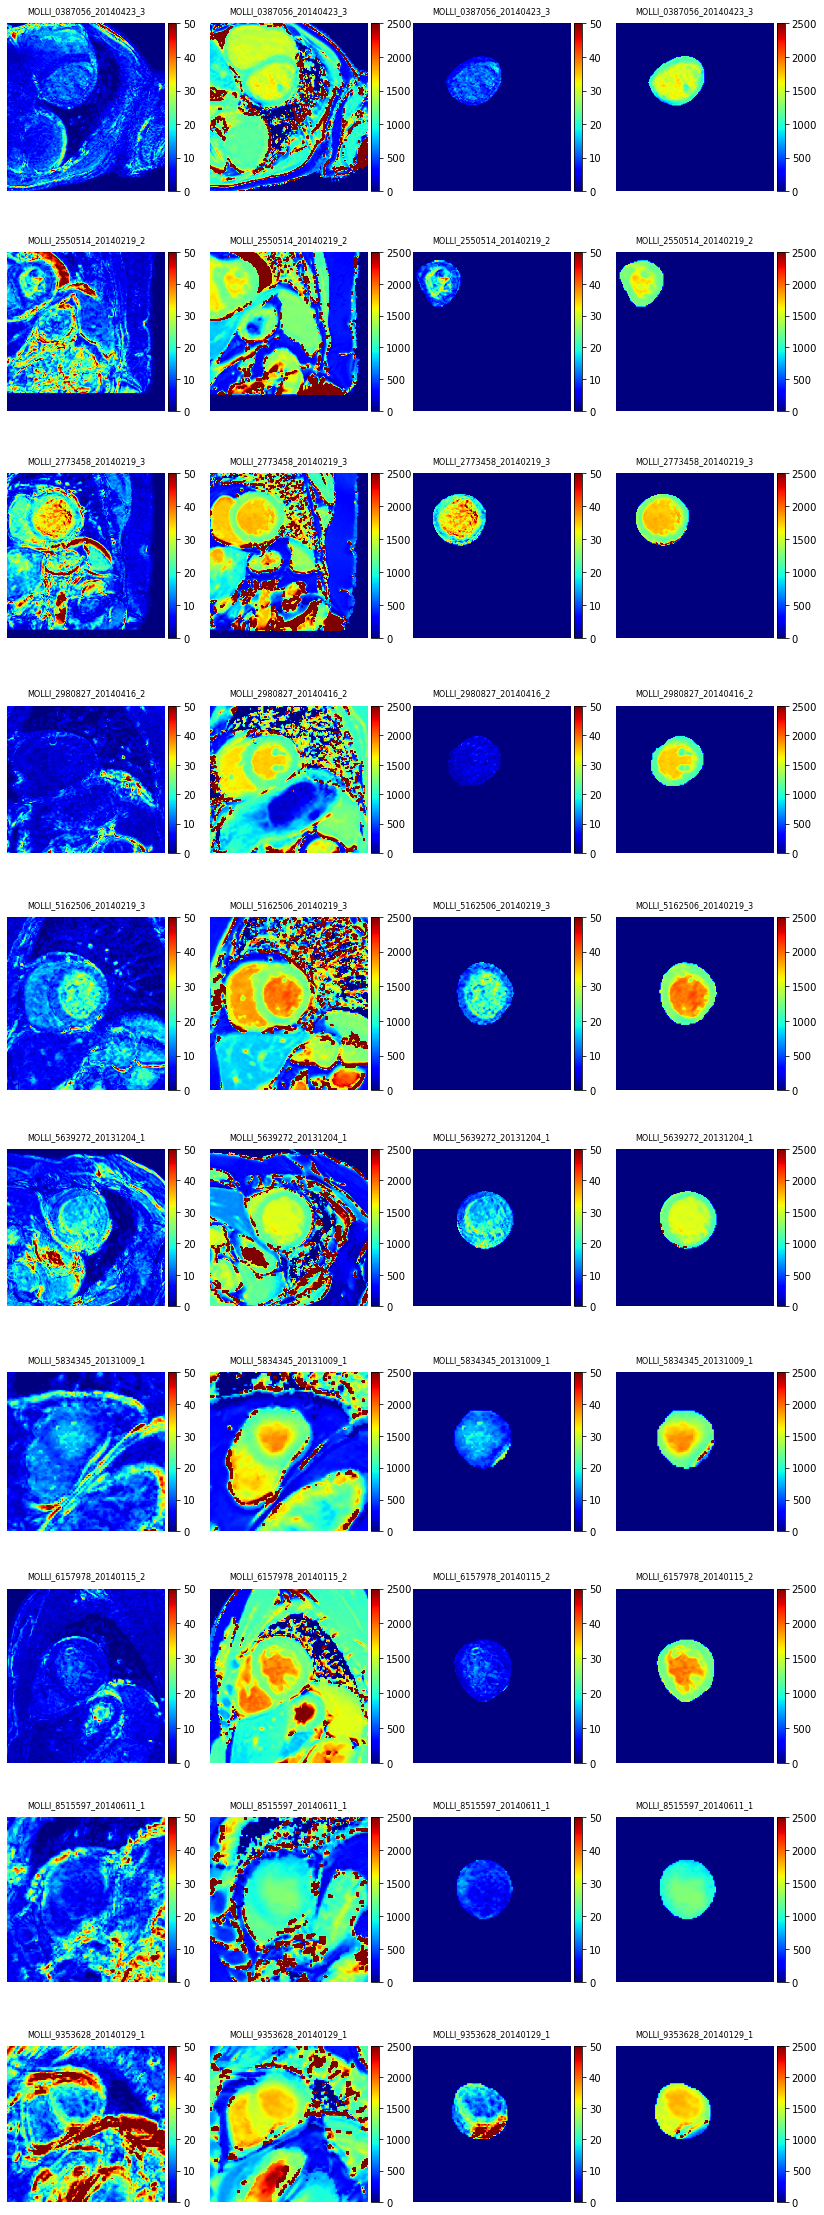

In [5]:
path = "data/MOLLI_pre_dataset/T1_SDerr"
# print(path)
fig = plt.figure(figsize=(12,36))
title_font_size=8
title_pad = 10
orig_t1err_square_list = []
orig_t1err_heart_list = []
subject_list = []

fig, subject_list, orig_t1err_square_list, orig_t1err_heart_list = plot_t1_changes(fig, path, subject_list, orig_t1err_square_list, orig_t1err_heart_list)

print(f"Mean of t1err is {np.mean(np.array(orig_t1err_square_list))} and std is {np.std(np.array(orig_t1err_square_list))}")
print(f"Mean of t1err is {np.mean(np.array(orig_t1err_heart_list))} and std is {np.std(np.array(orig_t1err_heart_list))}")
plt.savefig(f"data/MOLLI_pre_dataset/T1_SDerr/orig_t1err.png", dpi=300)

df['Cases'] = subject_list
df['Raw Square T1err'] = orig_t1err_square_list
df['Raw Heart T1err'] = orig_t1err_heart_list
df_2['Cases'] = subject_list
df_2['Raw PCA'] = orig_pca_changes

### Round 1

In [6]:
import voxelmorph_group as vxm  # nopep8
import numpy as np
import glob
import os
jacobian = vxm.losses.Jacobian().loss

In [7]:
r = 1
root = f"results/MOLLI_pre/group/rank_5_5_5_5_5_5_5/nmi/smooth/image_loss_weight1/cycle_loss_weight0.01/weight0.001/bspline/cps4_svfsteps7_svfscale1/e80/test_MOLLI_pre"
base_path = f"{root}/round{r}"

#### First Eigen Component percentage

In [8]:
path = f"{base_path}/moved"
pca_changes = []
for file in sorted(glob.glob(os.path.join(path, '*.npy'))):
    vols = np.load(file).transpose(1, 2, 0)
    eig_org, org_K, org_dis = pca(vols, topk=1)
    pca_changes.append(org_dis)
print(f"Mean of Round 1 PCA is {np.mean(np.array(pca_changes))} and std is {np.std(np.array(pca_changes))}")

Mean of Round 1 PCA is 0.7936123727544484 and std is 0.0240654275945773


#### Jacobian Determination

In [9]:
folding_ratio_list = []
mag_det_jac_det_list = []
path = f"{base_path}/warp"
for file in sorted(glob.glob(os.path.join(path, '*.nii'))):
    disp = vxm.py.utils.load_volfile(file).transpose(2, 3, 0, 1)
    folding_ratio, mag_det_jac_det = jacobian(disp)
    folding_ratio_list.append(folding_ratio)
    mag_det_jac_det_list.append(mag_det_jac_det)

print(f"Mean of folding ratio is {np.mean(np.array(folding_ratio_list))}")
print(f"Mean of mag det jac det is {np.mean(np.array(mag_det_jac_det_list))}")

Mean of folding ratio is 0.0
Mean of mag det jac det is 0.0026211198419332504


#### T1 fitting

Mean of t1err is 10.26524248863615 and std is 4.459882696338874
Mean of t1err is 13.73741653932584 and std is 7.115940564762637


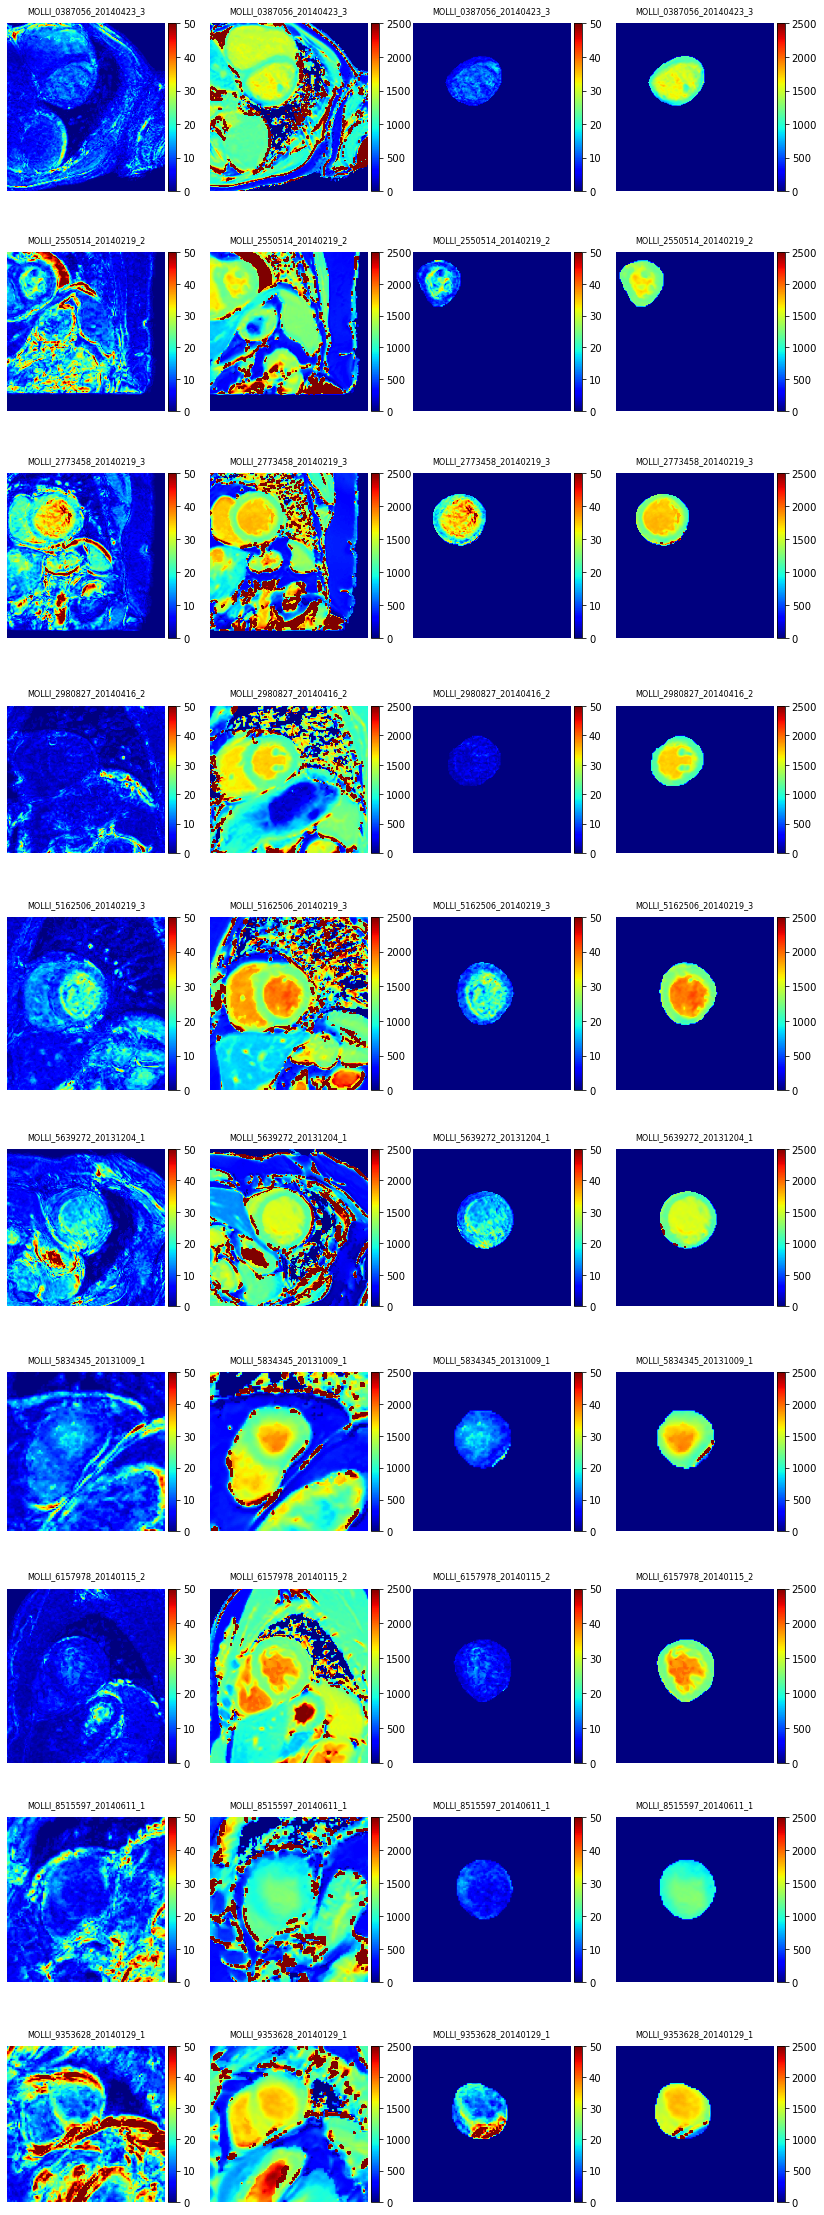

In [10]:
import matplotlib.pyplot as plt

path = f"{base_path}/t1_SDerr"
# print(path)
fig = plt.figure(figsize=(12, 36))
title_font_size=8
title_pad = 10
t1err_square_list = []
t1err_heart_list = []
subject_list = []

fig, subject_list, t1err_square_list, t1err_heart_list = plot_t1_changes(fig, path, subject_list, t1err_square_list, t1err_heart_list)

print(f"Mean of t1err is {np.mean(np.array(t1err_square_list))} and std is {np.std(np.array(t1err_square_list))}")
print(f"Mean of t1err is {np.mean(np.array(t1err_heart_list))} and std is {np.std(np.array(t1err_heart_list))}")
plt.savefig(f"{base_path}/t1_SDerr.png", dpi=300)

df['R1 Square T1err'] = t1err_square_list
df['R1 Heart T1err'] = t1err_heart_list
df_2['R1 PCA'] = pca_changes
df_2['R1 Det'] = mag_det_jac_det_list
df_2['R1 Fold ratio'] = folding_ratio_list

### Round 2

In [11]:
r = 2
base_path = f"{root}/round{r}"

#### First Eigen Component percentage

In [12]:
path = f"{base_path}/moved"
pca_changes = []
for file in sorted(glob.glob(os.path.join(path, '*.npy'))):
    vols = np.load(file).transpose(1, 2, 0)
    eig_org, org_K, org_dis = pca(vols, topk=1)
    pca_changes.append(org_dis)
print(f"Mean of Round 2 PCA is {np.mean(np.array(pca_changes))} and std is {np.std(np.array(pca_changes))}")

Mean of Round 2 PCA is 0.7967529945391378 and std is 0.023340249584121175


#### Jacobian Determination

In [13]:
folding_ratio_list = []
mag_det_jac_det_list = []
path = f"{base_path}/warp"
for file in sorted(glob.glob(os.path.join(path, '*.nii'))):
    disp = vxm.py.utils.load_volfile(file).transpose(2, 3, 0, 1)
    folding_ratio, mag_det_jac_det = jacobian(disp)
    folding_ratio_list.append(folding_ratio)
    mag_det_jac_det_list.append(mag_det_jac_det)

print(f"Mean of folding ratio is {np.mean(np.array(folding_ratio_list))}")
print(f"Mean of mag det jac det is {np.mean(np.array(mag_det_jac_det_list))}")

Mean of folding ratio is 0.0
Mean of mag det jac det is 0.0017628816422075033


#### T1 fitting

Mean of t1err is 9.86120981884049 and std is 4.2383427213970934
Mean of t1err is 13.622328701413483 and std is 7.051099134990807


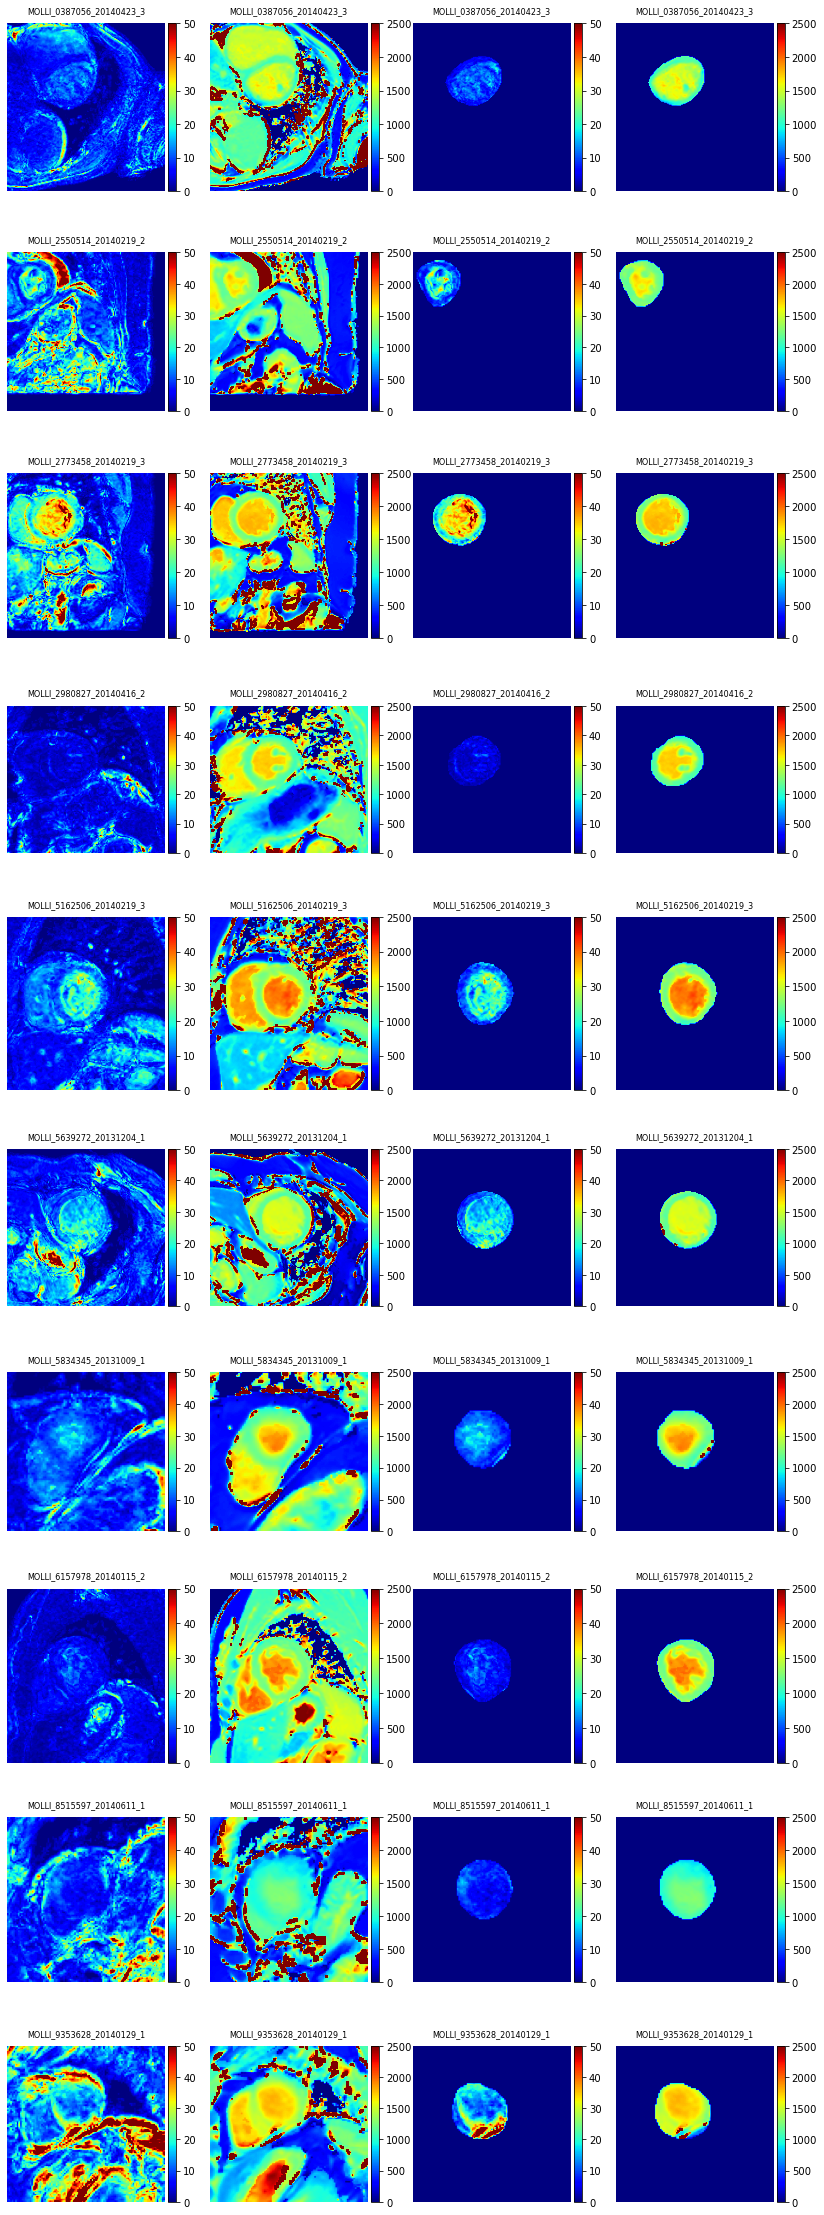

In [14]:
import matplotlib.pyplot as plt

path = f"{base_path}/t1_SDerr"
# print(path)
fig = plt.figure(figsize=(12, 36))
title_font_size=8
title_pad = 10
t1err_square_list = []
t1err_heart_list = []
subject_list = []

fig, subject_list, t1err_square_list, t1err_heart_list = plot_t1_changes(fig, path, subject_list, t1err_square_list, t1err_heart_list)

print(f"Mean of t1err is {np.mean(np.array(t1err_square_list))} and std is {np.std(np.array(t1err_square_list))}")
print(f"Mean of t1err is {np.mean(np.array(t1err_heart_list))} and std is {np.std(np.array(t1err_heart_list))}")
plt.savefig(f"{base_path}/t1_SDerr.png", dpi=300)

df['R2 Square T1err'] = t1err_square_list
df['R2 Heart T1err'] = t1err_heart_list
df_2['R2 PCA'] = pca_changes
df_2['R2 Det'] = mag_det_jac_det_list
df_2['R2 Fold ratio'] = folding_ratio_list

### Round 3

In [15]:
r = 3
base_path = f"{root}/round{r}"

#### First Eigen Component percentage

In [16]:
path = f"{base_path}/moved"
r5_pca_changes = []
for file in sorted(glob.glob(os.path.join(path, '*.npy'))):
    vols = np.load(file).transpose(1, 2, 0)
    eig_org, org_K, org_dis = pca(vols, topk=1)
    r5_pca_changes.append(org_dis)
print(f"Mean of Round 2 PCA is {np.mean(np.array(r5_pca_changes))} and std is {np.std(np.array(r5_pca_changes))}")

Mean of Round 2 PCA is 0.7990266444487459 and std is 0.022872551626881208


#### Jacobian Determination

In [17]:
r5_folding_ratio_list = []
r5_mag_det_jac_det_list = []
path = f"{base_path}/warp"
for file in sorted(glob.glob(os.path.join(path, '*.nii'))):
    disp = vxm.py.utils.load_volfile(file).transpose(2, 3, 0, 1)
    folding_ratio, mag_det_jac_det = jacobian(disp)
    r5_folding_ratio_list.append(folding_ratio)
    r5_mag_det_jac_det_list.append(mag_det_jac_det)

print(f"Mean of folding ratio is {np.mean(np.array(r5_folding_ratio_list))}")
print(f"Mean of mag det jac det is {np.mean(np.array(r5_mag_det_jac_det_list))}")

Mean of folding ratio is 0.0
Mean of mag det jac det is 0.0018309993902221322


#### T1 fitting

Mean of t1err is 9.67459175730091 and std is 4.134718482495384
Mean of t1err is 13.432140101186466 and std is 6.923024840973279


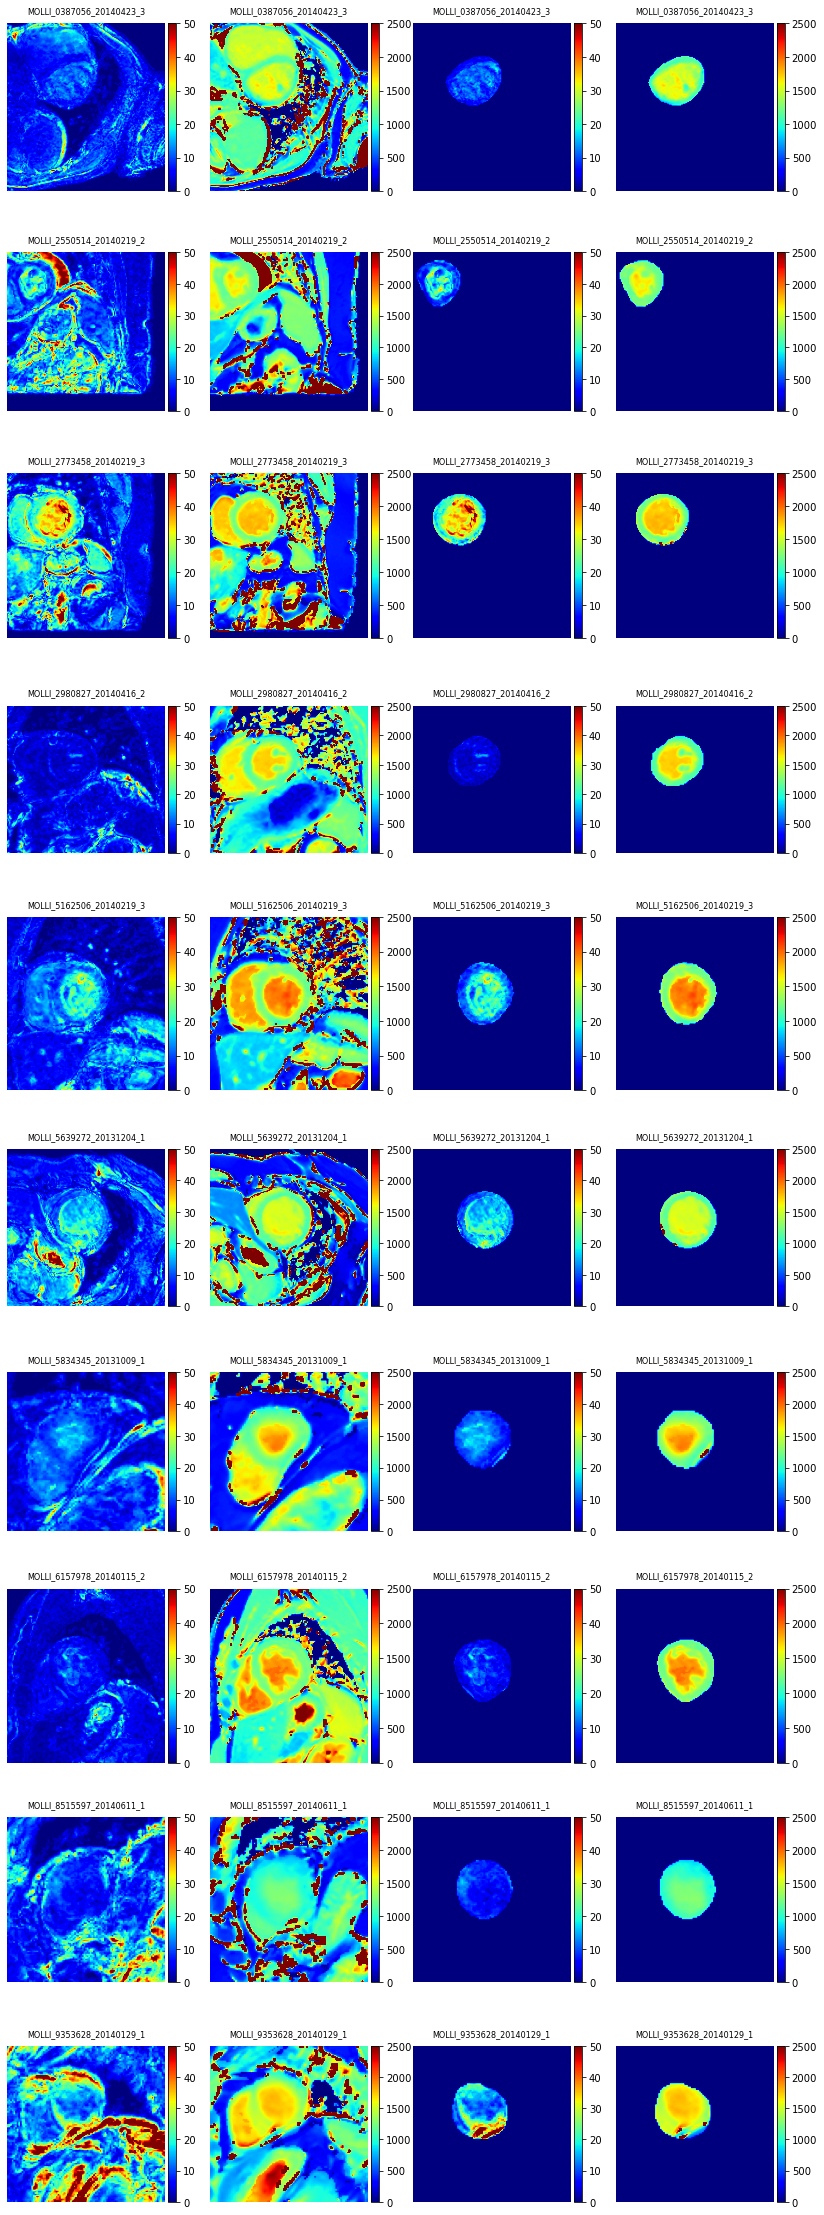

In [18]:
import matplotlib.pyplot as plt

path = f"{base_path}/t1_SDerr"
# print(path)
fig = plt.figure(figsize=(12, 36))
title_font_size=8
title_pad = 10
t1err_square_list = []
t1err_heart_list = []
subject_list = []

fig, subject_list, t1err_square_list, t1err_heart_list = plot_t1_changes(fig, path, subject_list, t1err_square_list, t1err_heart_list)

print(f"Mean of t1err is {np.mean(np.array(t1err_square_list))} and std is {np.std(np.array(t1err_square_list))}")
print(f"Mean of t1err is {np.mean(np.array(t1err_heart_list))} and std is {np.std(np.array(t1err_heart_list))}")
plt.savefig(f"{base_path}/t1_SDerr.png", dpi=300)

df['R3 Square T1err'] = t1err_square_list
df['R3 Heart T1err'] = t1err_heart_list
df_2['R3 PCA'] = pca_changes
df_2['R3 Det'] = mag_det_jac_det_list
df_2['R3 Fold ratio'] = folding_ratio_list

### Round 4

In [19]:
r = 4
base_path = f"{root}/round{r}"

#### First Eigen Component percentage

In [20]:
path = f"{base_path}/moved"
pca_changes = []
for file in sorted(glob.glob(os.path.join(path, '*.npy'))):
    vols = np.load(file).transpose(1, 2, 0)
    eig_org, org_K, org_dis = pca(vols, topk=1)
    pca_changes.append(org_dis)
print(f"Mean of Round 2 PCA is {np.mean(np.array(pca_changes))} and std is {np.std(np.array(pca_changes))}")

Mean of Round 2 PCA is 0.8000612287800806 and std is 0.022805827647106633


#### Jacobian Determination

In [21]:
folding_ratio_list = []
mag_det_jac_det_list = []
path = f"{base_path}/warp"
for file in sorted(glob.glob(os.path.join(path, '*.nii'))):
    disp = vxm.py.utils.load_volfile(file).transpose(2, 3, 0, 1)
    folding_ratio, mag_det_jac_det = jacobian(disp)
    folding_ratio_list.append(folding_ratio)
    mag_det_jac_det_list.append(mag_det_jac_det)

print(f"Mean of folding ratio is {np.mean(np.array(folding_ratio_list))}")
print(f"Mean of mag det jac det is {np.mean(np.array(mag_det_jac_det_list))}")

Mean of folding ratio is 0.0
Mean of mag det jac det is 0.0011857544304803014


#### T1 fitting

Mean of t1err is 9.53755501706826 and std is 4.046547028560406
Mean of t1err is 13.149862025602136 and std is 6.750486808617866


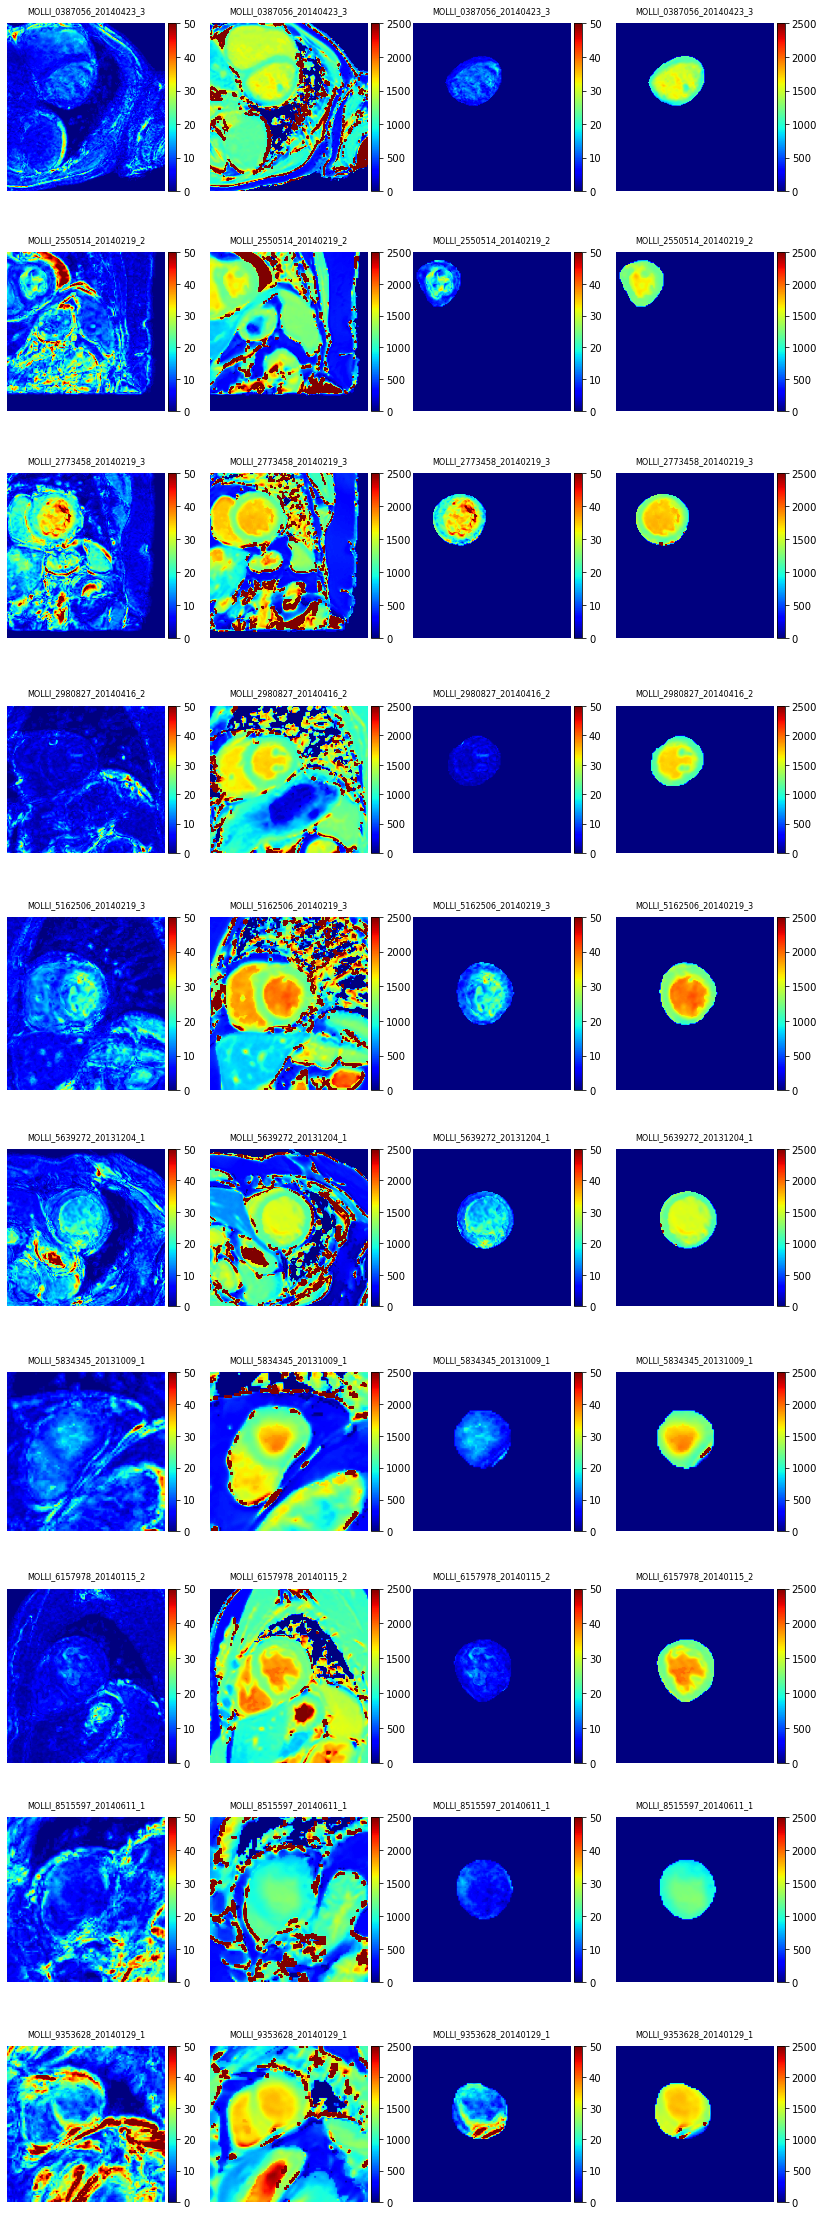

In [22]:
import matplotlib.pyplot as plt

path = f"{base_path}/t1_SDerr"
# print(path)
fig = plt.figure(figsize=(12, 36))
title_font_size=8
title_pad = 10
t1err_square_list = []
t1err_heart_list = []
subject_list = []

fig, subject_list, t1err_square_list, t1err_heart_list = plot_t1_changes(fig, path, subject_list, t1err_square_list, t1err_heart_list)

print(f"Mean of t1err is {np.mean(np.array(t1err_square_list))} and std is {np.std(np.array(t1err_square_list))}")
print(f"Mean of t1err is {np.mean(np.array(t1err_heart_list))} and std is {np.std(np.array(t1err_heart_list))}")
plt.savefig(f"{base_path}/t1_SDerr.png", dpi=300)

df['R4 Square T1err'] = t1err_square_list
df['R4 Heart T1err'] = t1err_heart_list
df_2['R4 PCA'] = pca_changes
df_2['R4 Det'] = mag_det_jac_det_list
df_2['R4 Fold ratio'] = folding_ratio_list

### Round 5

In [23]:
r = 5
base_path = f"{root}/round{r}"

#### First Eigen Component percentage

In [24]:
path = f"{base_path}/moved"
pca_changes = []
for file in sorted(glob.glob(os.path.join(path, '*.npy'))):
    vols = np.load(file).transpose(1, 2, 0)
    eig_org, org_K, org_dis = pca(vols, topk=1)
    pca_changes.append(org_dis)
print(f"Mean of Round 2 PCA is {np.mean(np.array(pca_changes))} and std is {np.std(np.array(pca_changes))}")

Mean of Round 2 PCA is 0.8010218545580423 and std is 0.02273864914955354


#### Jacobian Determination

In [25]:
folding_ratio_list = []
mag_det_jac_det_list = []
path = f"{base_path}/warp"
for file in sorted(glob.glob(os.path.join(path, '*.nii'))):
    disp = vxm.py.utils.load_volfile(file).transpose(2, 3, 0, 1)
    folding_ratio, mag_det_jac_det = jacobian(disp)
    folding_ratio_list.append(folding_ratio)
    mag_det_jac_det_list.append(mag_det_jac_det)

print(f"Mean of folding ratio is {np.mean(np.array(folding_ratio_list))}")
print(f"Mean of mag det jac det is {np.mean(np.array(mag_det_jac_det_list))}")

Mean of folding ratio is 0.0
Mean of mag det jac det is 0.0010249997721984982


#### T1 fitting

Mean of t1err is 9.42026046136466 and std is 3.957451545161135
Mean of t1err is 12.97814373713357 and std is 6.637109803173012


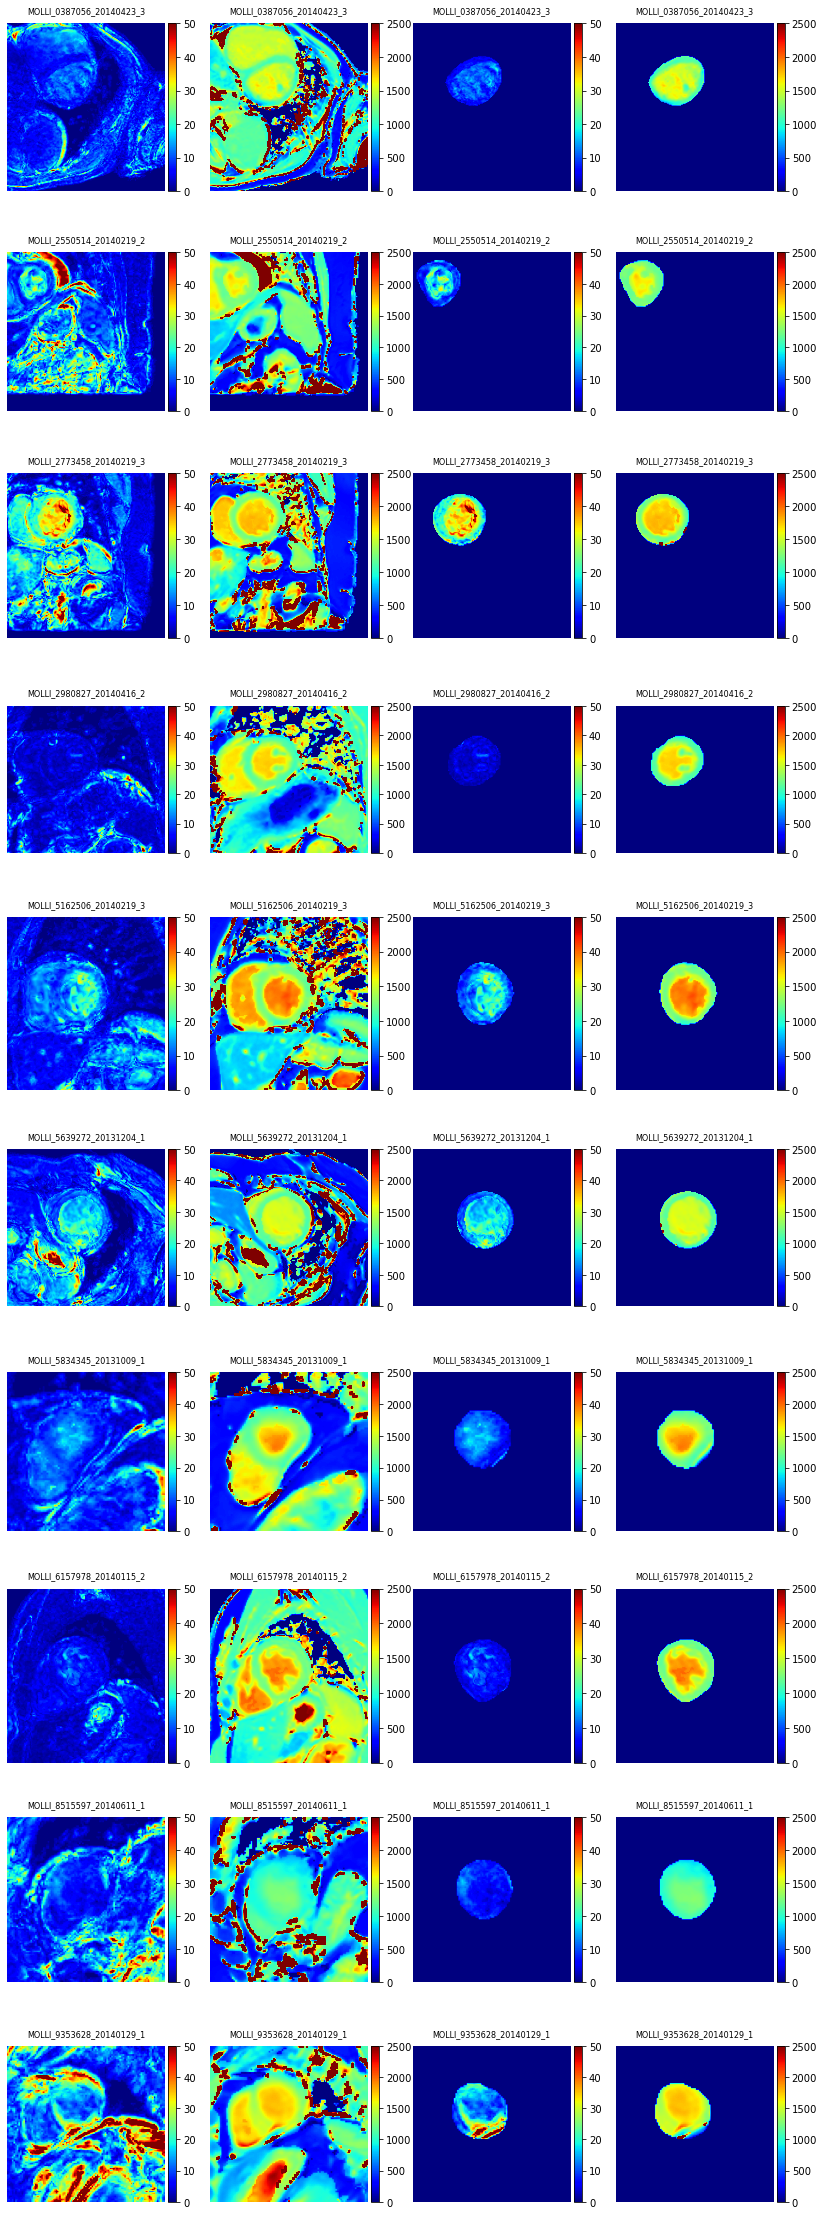

In [26]:
import matplotlib.pyplot as plt

path = f"{base_path}/t1_SDerr"
# print(path)
fig = plt.figure(figsize=(12, 36))
title_font_size=8
title_pad = 10
t1err_square_list = []
t1err_heart_list = []
subject_list = []

fig, subject_list, t1err_square_list, t1err_heart_list = plot_t1_changes(fig, path, subject_list, t1err_square_list, t1err_heart_list)

print(f"Mean of t1err is {np.mean(np.array(t1err_square_list))} and std is {np.std(np.array(t1err_square_list))}")
print(f"Mean of t1err is {np.mean(np.array(t1err_heart_list))} and std is {np.std(np.array(t1err_heart_list))}")
plt.savefig(f"{base_path}/t1_SDerr.png", dpi=300)

df['R5 Square T1err'] = t1err_square_list
df['R5 Heart T1err'] = t1err_heart_list
df_2['R5 PCA'] = pca_changes
df_2['R5 Det'] = mag_det_jac_det_list
df_2['R5 Fold ratio'] = folding_ratio_list

### Round 6

In [27]:
r = 6
base_path = f"{root}/round{r}"

#### First Eigen Component percentage

In [28]:
path = f"{base_path}/moved"
pca_changes = []
for file in sorted(glob.glob(os.path.join(path, '*.npy'))):
    vols = np.load(file).transpose(1, 2, 0)
    eig_org, org_K, org_dis = pca(vols, topk=1)
    pca_changes.append(org_dis)
print(f"Mean of Round 2 PCA is {np.mean(np.array(pca_changes))} and std is {np.std(np.array(pca_changes))}")

Mean of Round 2 PCA is 0.8016775361612988 and std is 0.0225945125522707


#### Jacobian Determination

In [29]:
folding_ratio_list = []
mag_det_jac_det_list = []
path = f"{base_path}/warp"
for file in sorted(glob.glob(os.path.join(path, '*.nii'))):
    disp = vxm.py.utils.load_volfile(file).transpose(2, 3, 0, 1)
    folding_ratio, mag_det_jac_det = jacobian(disp)
    folding_ratio_list.append(folding_ratio)
    mag_det_jac_det_list.append(mag_det_jac_det)

print(f"Mean of folding ratio is {np.mean(np.array(folding_ratio_list))}")
print(f"Mean of mag det jac det is {np.mean(np.array(mag_det_jac_det_list))}")

Mean of folding ratio is 0.0
Mean of mag det jac det is 0.0008523925207555294


#### T1 fitting

Mean of t1err is 9.322550756530923 and std is 3.8980695292524232
Mean of t1err is 12.913798585229225 and std is 6.596240679952392


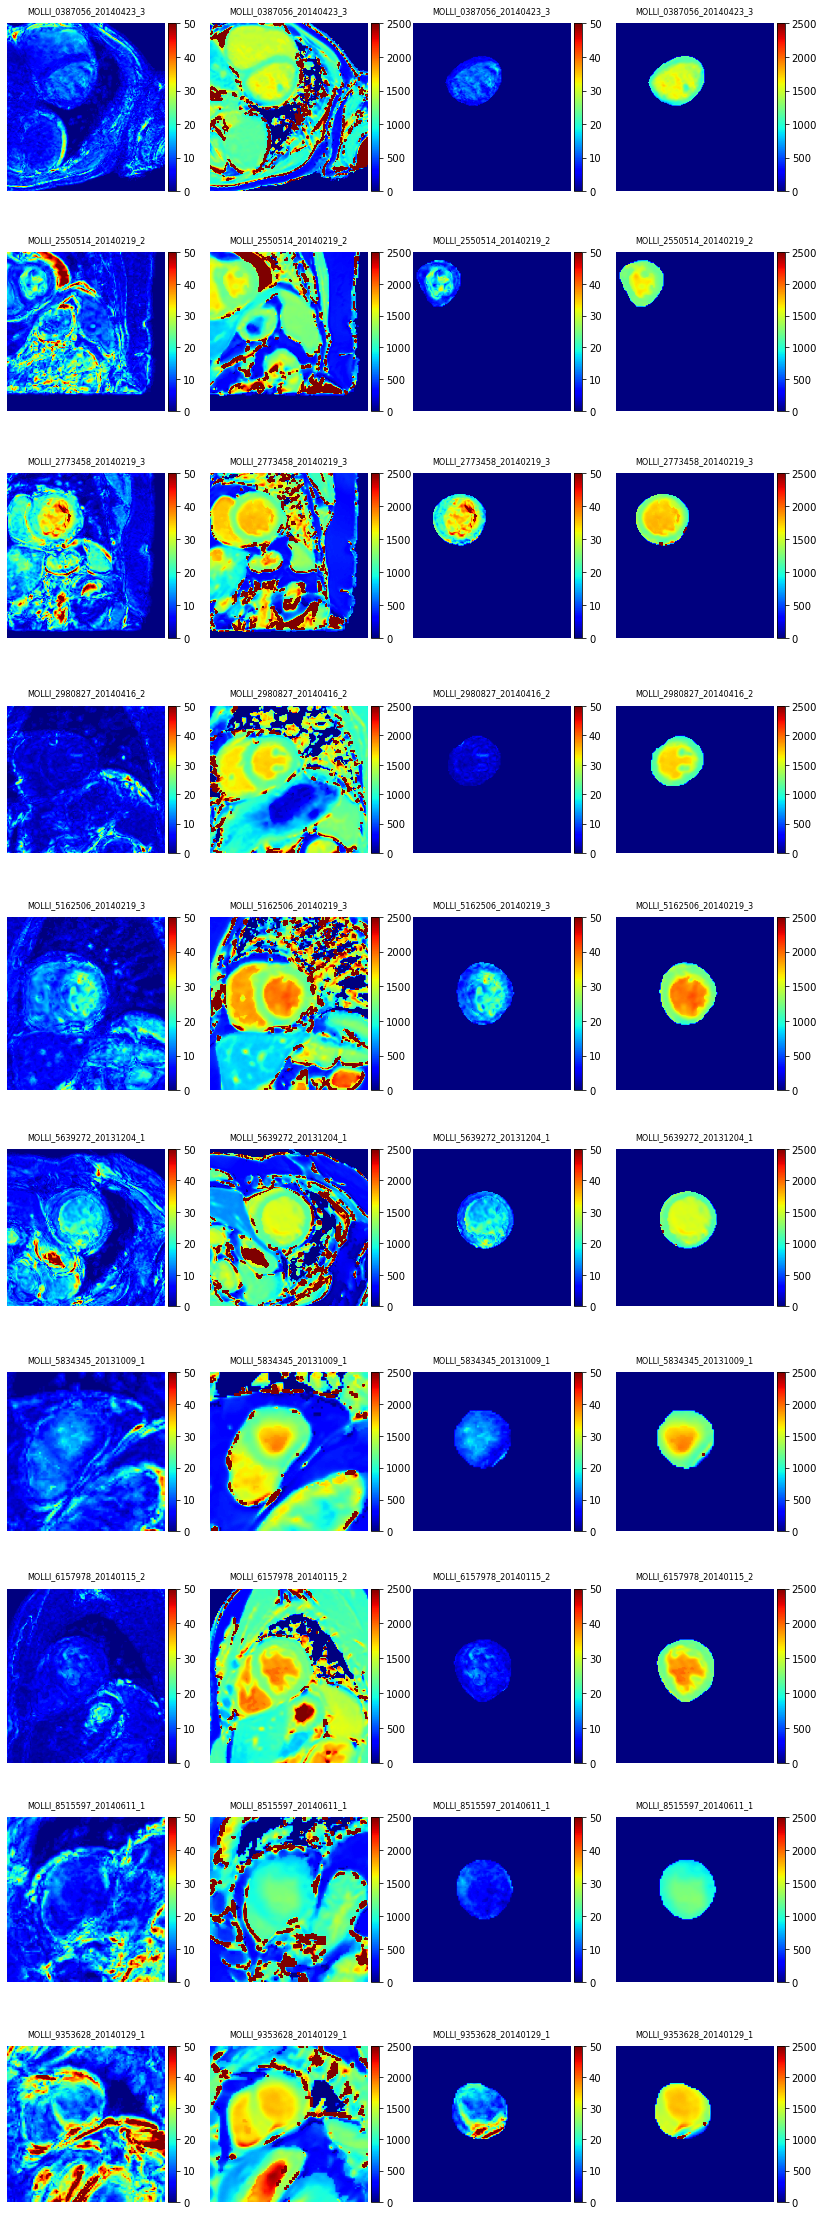

In [30]:
import matplotlib.pyplot as plt

path = f"{base_path}/t1_SDerr"
# print(path)
fig = plt.figure(figsize=(12, 36))
title_font_size=8
title_pad = 10
t1err_square_list = []
t1err_heart_list = []
subject_list = []

fig, subject_list, t1err_square_list, t1err_heart_list = plot_t1_changes(fig, path, subject_list, t1err_square_list, t1err_heart_list)

print(f"Mean of t1err is {np.mean(np.array(t1err_square_list))} and std is {np.std(np.array(t1err_square_list))}")
print(f"Mean of t1err is {np.mean(np.array(t1err_heart_list))} and std is {np.std(np.array(t1err_heart_list))}")
plt.savefig(f"{base_path}/t1_SDerr.png", dpi=300)

df['R6 Square T1err'] = t1err_square_list
df['R6 Heart T1err'] = t1err_heart_list
df_2['R6 PCA'] = pca_changes
df_2['R6 Det'] = mag_det_jac_det_list
df_2['R6 Fold ratio'] = folding_ratio_list

### Round 7

In [31]:
r = 7
base_path = f"{root}/round{r}"

#### First Eigen Component percentage

In [32]:
path = f"{base_path}/moved"
pca_changes = []
for file in sorted(glob.glob(os.path.join(path, '*.npy'))):
    vols = np.load(file).transpose(1, 2, 0)
    eig_org, org_K, org_dis = pca(vols, topk=1)
    pca_changes.append(org_dis)
print(f"Mean of Round 2 PCA is {np.mean(np.array(pca_changes))} and std is {np.std(np.array(pca_changes))}")

Mean of Round 2 PCA is 0.8021629880668046 and std is 0.022483757836568752


#### Jacobian Determination

In [33]:
folding_ratio_list = []
mag_det_jac_det_list = []
path = f"{base_path}/warp"
for file in sorted(glob.glob(os.path.join(path, '*.nii'))):
    disp = vxm.py.utils.load_volfile(file).transpose(2, 3, 0, 1)
    folding_ratio, mag_det_jac_det = jacobian(disp)
    folding_ratio_list.append(folding_ratio)
    mag_det_jac_det_list.append(mag_det_jac_det)

print(f"Mean of folding ratio is {np.mean(np.array(folding_ratio_list))}")
print(f"Mean of mag det jac det is {np.mean(np.array(mag_det_jac_det_list))}")

Mean of folding ratio is 0.0
Mean of mag det jac det is 0.0007115834159776568


#### T1 fitting

Mean of t1err is 9.25839878760279 and std is 3.856898213966718
Mean of t1err is 12.832851505386682 and std is 6.541469758837002


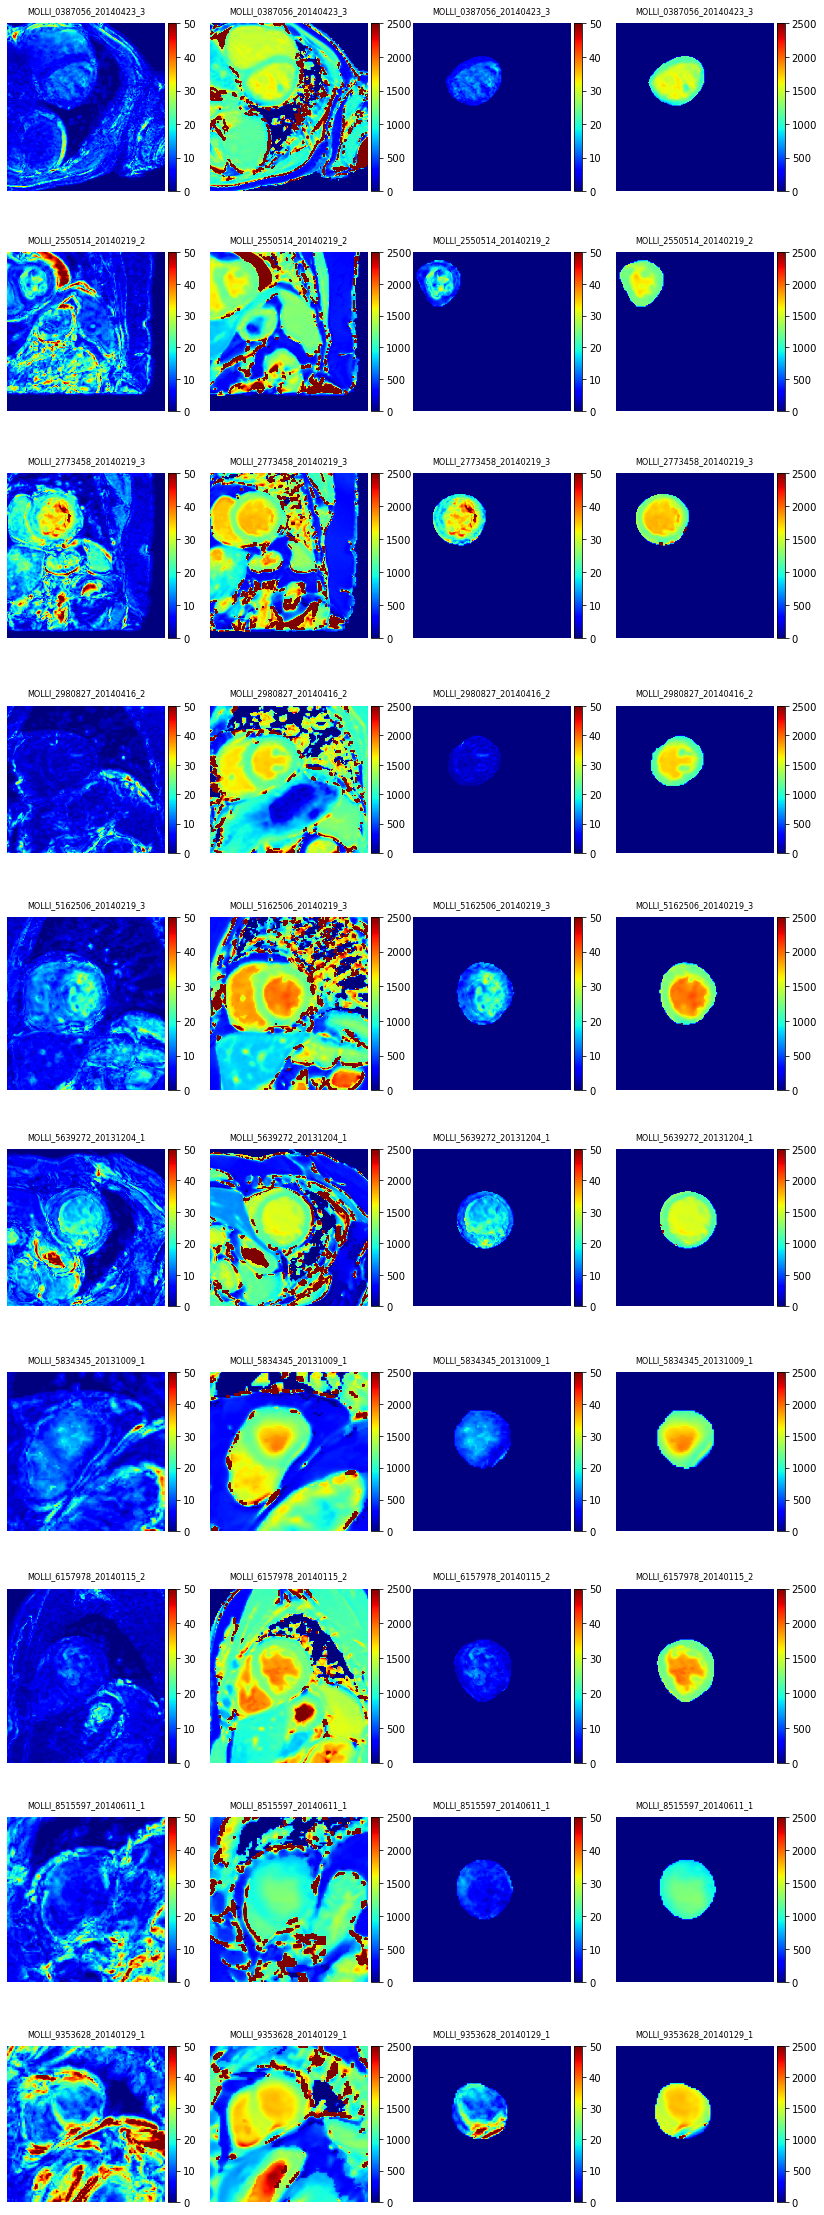

In [34]:
import matplotlib.pyplot as plt

path = f"{base_path}/t1_SDerr"
# print(path)
fig = plt.figure(figsize=(12, 36))
title_font_size=8
title_pad = 10
t1err_square_list = []
t1err_heart_list = []
subject_list = []

fig, subject_list, t1err_square_list, t1err_heart_list = plot_t1_changes(fig, path, subject_list, t1err_square_list, t1err_heart_list)

print(f"Mean of t1err is {np.mean(np.array(t1err_square_list))} and std is {np.std(np.array(t1err_square_list))}")
print(f"Mean of t1err is {np.mean(np.array(t1err_heart_list))} and std is {np.std(np.array(t1err_heart_list))}")
plt.savefig(f"{base_path}/t1_SDerr.png", dpi=300)

df['R7 Square T1err'] = t1err_square_list
df['R7 Heart T1err'] = t1err_heart_list
df_2['R7 PCA'] = pca_changes
df_2['R7 Det'] = mag_det_jac_det_list
df_2['R7 Fold ratio'] = folding_ratio_list

### Summary

In [35]:
df

Cases  Raw Square T1err  Raw Heart T1err  \
0  MOLLI_0387056_20140423_3          7.539072         9.731935   
1  MOLLI_2550514_20140219_2         12.360840        14.576425   
2  MOLLI_2773458_20140219_3         13.635501        28.671655   
3  MOLLI_2980827_20140416_2          5.785524         3.958349   
4  MOLLI_5162506_20140219_3          8.644283        17.141349   
5  MOLLI_5639272_20131204_1         11.297461        17.010539   
6  MOLLI_5834345_20131009_1         10.555566        12.637421   
7  MOLLI_6157978_20140115_2          5.011841         6.933013   
8  MOLLI_8515597_20140611_1         12.463286         7.736930   
9  MOLLI_9353628_20140129_1         23.435838        23.772507   

   R1 Square T1err  R1 Heart T1err  R2 Square T1err  R2 Heart T1err  \
0         7.206494        9.498229         7.110517        9.494909   
1        11.822665       14.345885        11.436714       14.075418   
2        12.678236       28.452372        12.184104       28.772508   
3         5.404934        3.924630         5.187813        4.012897   
4         8.025396       16.760429         7.888589       16.413463   
5        10.577483       16.450578        10.238127       16.154095   
6         9.318330       11.700645         8.554392       11.613398   
7         4.748632        6.680399         4.625731        6.929708   
8        11.686451        7.618844        11.155527        7.526464   
9        21.183805       21.942155        20.230584       21.230428   

   R3 Square T1err  R3 Heart T1err  R4 Square T1err  R4 Heart T1err  \
0         6.998630        9.506492         6.970002        9.536579   
1        11.237444       13.724434        11.128816       13.790835   
2        12.009551       28.507420        11.895420       28.006489   
3         5.071597        4.037409         4.979837        3.772918   
4         7.718716       16.057851         7.563709       15.296493   
5        10.086044       16.068452        10.034133       16.092102   
6         8.355446       11.230959         8.200245       11.036824   
7         4.594192        6.968509         4.547947        6.753123   
8        10.918913        7.519243        10.716250        7.502845   
9        19.755386       20.700631        19.339193       19.710413   

   R5 Square T1err  R5 Heart T1err  R6 Square T1err  R6 Heart T1err  \
0         6.909555        9.371266         6.876699        9.501171   
1        10.992013       13.606218        10.847365       13.520865   
2        11.750272       27.686913        11.724366       27.541520   
3         4.913087        3.747068         4.848986        3.632785   
4         7.494522       15.018013         7.454762       14.958164   
5         9.969834       16.164897         9.907065       16.022006   
6         8.095716       10.798758         7.943083       10.797923   
7         4.511948        6.763541         4.479462        6.719439   
8        10.615942        7.497028        10.475429        7.472950   
9        18.949715       19.127735        18.668291       18.971164   

   R7 Square T1err  R7 Heart T1err  
0         6.844715        9.412387  
1        10.793900       13.480880  
2        11.633350       27.270985  
3         4.819301        3.569913  
4         7.427081       14.936861  
5         9.877666       16.083912  
6         7.875074       10.724496  
7         4.465308        6.633178  
8        10.347042        7.473314  
9        18.500550       18.742591

In [36]:
df.describe()

Raw Square T1err  Raw Heart T1err  R1 Square T1err  R1 Heart T1err  \
count         10.000000        10.000000        10.000000       10.000000   
mean          11.072921        14.217012        10.265242       13.737417   
std            5.232358         7.743300         4.701129        7.500860   
min            5.011841         3.958349         4.748632        3.924630   
25%            7.815375         8.235682         7.411219        8.088690   
50%           10.926513        13.606923         9.947906       13.023265   
75%           12.437674        17.108646        11.788611       16.682966   
max           23.435838        28.671655        21.183805       28.452372   

       R2 Square T1err  R2 Heart T1err  R3 Square T1err  R3 Heart T1err  \
count        10.000000       10.000000        10.000000       10.000000   
mean          9.861210       13.622329         9.674592       13.432140   
std           4.467606        7.432511         4.358376        7.297509   
min           4.625731        4.012897         4.594192        4.037409   
25%           7.305035        8.018575         7.178651        8.016055   
50%           9.396259       12.844408         9.220745       12.477696   
75%          11.366417       16.348621        11.157811       16.065802   
max          20.230584       28.772508        19.755386       28.507420   

       R4 Square T1err  R4 Heart T1err  R5 Square T1err  R5 Heart T1err  \
count        10.000000       10.000000        10.000000       10.000000   
mean          9.537555       13.149862         9.420260       12.978144   
std           4.265435        7.115638         4.171520        6.996128   
min           4.547947        3.772918         4.511948        3.747068   
25%           7.118429        8.011278         7.055797        7.965588   
50%           9.117189       12.413829         9.032775       12.202488   
75%          11.025674       15.893200        10.897996       15.878176   
max          19.339193       28.006489        18.949715       27.686913   

       R6 Square T1err  R6 Heart T1err  R7 Square T1err  R7 Heart T1err  
count        10.000000       10.000000        10.000000       10.000000  
mean          9.322551       12.913799         9.258399       12.832852  
std           4.108926        6.953048         4.065528        6.895315  
min           4.479462        3.632785         4.465308        3.569913  
25%           7.021215        7.980005         6.990307        7.958082  
50%           8.925074       12.159394         8.876370       12.102688  
75%          10.754381       15.756045        10.682185       15.797149  
max          18.668291       27.541520        18.500550       27.270985

In [37]:
df['R7/Raw Square %'] = (df['Raw Square T1err'] - df['R7 Square T1err']) / df['Raw Square T1err']
df['R7/Raw Heart %'] = (df['Raw Heart T1err'] - df['R7 Heart T1err']) / df['Raw Heart T1err']
df['R1/Raw Heart %'] = (df['Raw Heart T1err'] - df['R1 Heart T1err']) / df['Raw Heart T1err']
df['R2/Raw Heart %'] = (df['Raw Heart T1err'] - df['R2 Heart T1err']) / df['Raw Heart T1err']
df['R3/Raw Heart %'] = (df['Raw Heart T1err'] - df['R3 Heart T1err']) / df['Raw Heart T1err']
df['R4/Raw Heart %'] = (df['Raw Heart T1err'] - df['R4 Heart T1err']) / df['Raw Heart T1err']
df['R5/Raw Heart %'] = (df['Raw Heart T1err'] - df['R5 Heart T1err']) / df['Raw Heart T1err']
df['R6/Raw Heart %'] = (df['Raw Heart T1err'] - df['R6 Heart T1err']) / df['Raw Heart T1err']
df['R7/Raw Heart %'] = (df['Raw Heart T1err'] - df['R7 Heart T1err']) / df['Raw Heart T1err']
df.describe()

Raw Square T1err  Raw Heart T1err  R1 Square T1err  R1 Heart T1err  \
count         10.000000        10.000000        10.000000       10.000000   
mean          11.072921        14.217012        10.265242       13.737417   
std            5.232358         7.743300         4.701129        7.500860   
min            5.011841         3.958349         4.748632        3.924630   
25%            7.815375         8.235682         7.411219        8.088690   
50%           10.926513        13.606923         9.947906       13.023265   
75%           12.437674        17.108646        11.788611       16.682966   
max           23.435838        28.671655        21.183805       28.452372   

       R2 Square T1err  R2 Heart T1err  R3 Square T1err  R3 Heart T1err  \
count        10.000000       10.000000        10.000000       10.000000   
mean          9.861210       13.622329         9.674592       13.432140   
std           4.467606        7.432511         4.358376        7.297509   
min           4.625731        4.012897         4.594192        4.037409   
25%           7.305035        8.018575         7.178651        8.016055   
50%           9.396259       12.844408         9.220745       12.477696   
75%          11.366417       16.348621        11.157811       16.065802   
max          20.230584       28.772508        19.755386       28.507420   

       R4 Square T1err  R4 Heart T1err  ...  R7 Square T1err  R7 Heart T1err  \
count        10.000000       10.000000  ...        10.000000       10.000000   
mean          9.537555       13.149862  ...         9.258399       12.832852   
std           4.265435        7.115638  ...         4.065528        6.895315   
min           4.547947        3.772918  ...         4.465308        3.569913   
25%           7.118429        8.011278  ...         6.990307        7.958082   
50%           9.117189       12.413829  ...         8.876370       12.102688   
75%          11.025674       15.893200  ...        10.682185       15.797149   
max          19.339193       28.006489  ...        18.500550       27.270985   

       R7/Raw Square %  R7/Raw Heart %  R1/Raw Heart %  R2/Raw Heart %  \
count        10.000000       10.000000       10.000000       10.000000   
mean          0.154257        0.087833        0.031396        0.034988   
std           0.048568        0.059457        0.025082        0.037733   
min           0.092101        0.032835        0.007648       -0.013780   
25%           0.125947        0.044649        0.015401        0.006446   
50%           0.143822        0.064816        0.023118        0.030787   
75%           0.169100        0.120988        0.035557        0.048377   
max           0.253941        0.211585        0.076994        0.106934   

       R3/Raw Heart %  R4/Raw Heart %  R5/Raw Heart %  R6/Raw Heart %  
count       10.000000       10.000000       10.000000       10.000000  
mean         0.044949        0.065936        0.076126        0.081572  
std          0.048471        0.051522        0.058309        0.058950  
min         -0.019973        0.020074        0.024444        0.023712  
25%          0.010087        0.027024        0.035024        0.035444  
50%          0.041759        0.050370        0.051544        0.065264  
75%          0.062020        0.094218        0.109544        0.116085  
max          0.129220        0.170874        0.195384        0.201970  

[8 rows x 24 columns]

In [39]:
df_2

Cases   Raw PCA    R1 PCA    R1 Det  R1 Fold ratio  \
0  MOLLI_0387056_20140423_3  0.806249  0.811478  0.001805            0.0   
1  MOLLI_2550514_20140219_2  0.792254  0.799049  0.002960            0.0   
2  MOLLI_2773458_20140219_3  0.773361  0.779821  0.002725            0.0   
3  MOLLI_2980827_20140416_2  0.813012  0.818179  0.002717            0.0   
4  MOLLI_5162506_20140219_3  0.787799  0.793093  0.002808            0.0   
5  MOLLI_5639272_20131204_1  0.773060  0.778278  0.002313            0.0   
6  MOLLI_5834345_20131009_1  0.757565  0.767306  0.003158            0.0   
7  MOLLI_6157978_20140115_2  0.839774  0.845301  0.002290            0.0   
8  MOLLI_8515597_20140611_1  0.770515  0.778849  0.002843            0.0   
9  MOLLI_9353628_20140129_1  0.754133  0.764770  0.002592            0.0   

     R2 PCA    R2 Det  R2 Fold ratio    R3 PCA    R3 Det  ...  R4 Fold ratio  \
0  0.813815  0.001283            0.0  0.813815  0.001283  ...            0.0   
1  0.801642  0.001718            0.0  0.801642  0.001718  ...            0.0   
2  0.782915  0.001812            0.0  0.782915  0.001812  ...            0.0   
3  0.820651  0.001631            0.0  0.820651  0.001631  ...            0.0   
4  0.795363  0.001860            0.0  0.795363  0.001860  ...            0.0   
5  0.781113  0.001709            0.0  0.781113  0.001709  ...            0.0   
6  0.772276  0.002102            0.0  0.772276  0.002102  ...            0.0   
7  0.847502  0.001607            0.0  0.847502  0.001607  ...            0.0   
8  0.783122  0.002033            0.0  0.783122  0.002033  ...            0.0   
9  0.769129  0.001873            0.0  0.769129  0.001873  ...            0.0   

     R5 PCA    R5 Det  R5 Fold ratio    R6 PCA    R6 Det  R6 Fold ratio  \
0  0.816965  0.000903            0.0  0.817975  0.000681            0.0   
1  0.805533  0.000999            0.0  0.805962  0.000848            0.0   
2  0.786298  0.001045            0.0  0.786721  0.000866            0.0   
3  0.824175  0.000979            0.0  0.824608  0.000857            0.0   
4  0.798668  0.001029            0.0  0.799057  0.000857            0.0   
5  0.784409  0.000990            0.0  0.784926  0.000895            0.0   
6  0.779045  0.001124            0.0  0.780161  0.000877            0.0   
7  0.851553  0.001002            0.0  0.851892  0.000816            0.0   
8  0.788312  0.001099            0.0  0.789143  0.000954            0.0   
9  0.775260  0.001080            0.0  0.776329  0.000874            0.0   

     R7 PCA    R7 Det  R7 Fold ratio  
0  0.818480  0.000624            0.0  
1  0.806432  0.000718            0.0  
2  0.787058  0.000726            0.0  
3  0.824821  0.000688            0.0  
4  0.799265  0.000717            0.0  
5  0.785309  0.000678            0.0  
6  0.781085  0.000729            0.0  
7  0.852264  0.000694            0.0  
8  0.789881  0.000786            0.0  
9  0.777033  0.000755            0.0  

[10 rows x 23 columns]

In [40]:
df2 = df_2.drop(['R1 Fold ratio', 'R2 Fold ratio', 'R3 Fold ratio', 'R4 Fold ratio', 'R5 Fold ratio', 'R6 Fold ratio', 'R7 Fold ratio'], axis=1)
df2['R1/Raw PCA %'] = (df2['R1 PCA'] - df2['Raw PCA']) / df2['Raw PCA']
df2['R2/Raw PCA %'] = (df2['R2 PCA'] - df2['Raw PCA']) / df2['Raw PCA']
df2['R3/Raw PCA %'] = (df2['R3 PCA'] - df2['Raw PCA']) / df2['Raw PCA']
df2['R4/Raw PCA %'] = (df2['R4 PCA'] - df2['Raw PCA']) / df2['Raw PCA']
df2['R5/Raw PCA %'] = (df2['R5 PCA'] - df2['Raw PCA']) / df2['Raw PCA']
df2['R6/Raw PCA %'] = (df2['R6 PCA'] - df2['Raw PCA']) / df2['Raw PCA']
df2['R7/Raw PCA %'] = (df2['R7 PCA'] - df2['Raw PCA']) / df2['Raw PCA']
df2.describe()

Raw PCA     R1 PCA     R1 Det     R2 PCA     R2 Det     R3 PCA  \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean    0.786772   0.793612   0.002621   0.796753   0.001763   0.796753   
std     0.026789   0.025367   0.000391   0.024603   0.000233   0.024603   
min     0.754133   0.764770   0.001805   0.769129   0.001283   0.769129   
25%     0.771151   0.778421   0.002382   0.781564   0.001650   0.781564   
50%     0.780580   0.786457   0.002721   0.789242   0.001765   0.789242   
75%     0.802750   0.808371   0.002834   0.810772   0.001870   0.810772   
max     0.839774   0.845301   0.003158   0.847502   0.002102   0.847502   

          R3 Det     R4 PCA     R4 Det     R5 PCA  ...     R6 Det     R7 PCA  \
count  10.000000  10.000000  10.000000  10.000000  ...  10.000000  10.000000   
mean    0.001763   0.800061   0.001186   0.801022  ...   0.000852   0.802163   
std     0.000233   0.024039   0.000128   0.023969  ...   0.000070   0.023700   
min     0.001283   0.774066   0.000871   0.775260  ...   0.000681   0.777033   
25%     0.001650   0.784045   0.001167   0.784882  ...   0.000850   0.785747   
50%     0.001765   0.792512   0.001190   0.793490  ...   0.000862   0.794573   
75%     0.001870   0.813049   0.001228   0.814107  ...   0.000876   0.815468   
max     0.002102   0.850687   0.001358   0.851553  ...   0.000954   0.852264   

          R7 Det  R1/Raw PCA %  R2/Raw PCA %  R3/Raw PCA %  R4/Raw PCA %  \
count  10.000000     10.000000     10.000000     10.000000     10.000000   
mean    0.000712      0.008760      0.012788      0.012788      0.017023   
std     0.000044      0.002861      0.004215      0.004215      0.005740   
min     0.000624      0.006356      0.009203      0.009203      0.012006   
25%     0.000690      0.006616      0.009448      0.009448      0.012912   
50%     0.000717      0.007552      0.011134      0.011134      0.014410   
75%     0.000728      0.010256      0.015360      0.015360      0.020124   
max     0.000786      0.014105      0.019886      0.019886      0.026780   

       R5/Raw PCA %  R6/Raw PCA %  R7/Raw PCA %  
count     10.000000     10.000000     10.000000  
mean       0.018248      0.019089      0.019713  
std        0.005971      0.006301      0.006593  
min        0.013292      0.014263      0.014525  
25%        0.013855      0.014460      0.014948  
50%        0.015705      0.016312      0.016779  
75%        0.021514      0.022458      0.023324  
max        0.028354      0.029827      0.031048  

[8 rows x 22 columns]

In [41]:
df_det = df_2[['R1 Det', 'R2 Det', 'R3 Det', 'R4 Det', 'R5 Det', 'R6 Det', 'R7 Det']]
df_det.describe()

R1 Det     R2 Det     R3 Det     R4 Det     R5 Det     R6 Det  \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean    0.002621   0.001763   0.001763   0.001186   0.001025   0.000852   
std     0.000391   0.000233   0.000233   0.000128   0.000065   0.000070   
min     0.001805   0.001283   0.001283   0.000871   0.000903   0.000681   
25%     0.002382   0.001650   0.001650   0.001167   0.000993   0.000850   
50%     0.002721   0.001765   0.001765   0.001190   0.001015   0.000862   
75%     0.002834   0.001870   0.001870   0.001228   0.001072   0.000876   
max     0.003158   0.002102   0.002102   0.001358   0.001124   0.000954   

          R7 Det  
count  10.000000  
mean    0.000712  
std     0.000044  
min     0.000624  
25%     0.000690  
50%     0.000717  
75%     0.000728  
max     0.000786